## Gender Classification

The following example shows how NLTK uses features for gender classification of names.

In [1]:
import nltk
nltk.download("names")
from nltk.corpus import names

[nltk_data] Downloading package names to /home/jovyan/nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
m = names.words('male.txt')
len(m)

2943

In [3]:
f = names.words('female.txt')
len(f)

5001

### Creation of a training set and a test set

In [4]:
import random
random.seed(1234) # Set the seed to facilitate reproducibility
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names, devtest_names, test_names = names[1000:], names[500:1000], names[:500]
print("Size of training set:", len(train_names))
print(train_names[:3])
print("Size of devtest set:", len(devtest_names))
print(devtest_names[:3])
print("Size of test set:", len(test_names))
print(test_names[:3])

Size of training set: 6944
[('Marna', 'female'), ('Thadeus', 'male'), ('Jereme', 'male')]
Size of devtest set: 500
[('Ranice', 'female'), ('Faunie', 'female'), ('Holly-Anne', 'female')]
Size of test set: 500
[('Butler', 'male'), ('Umberto', 'male'), ('Aloysius', 'male')]


In [5]:
def ratio_gender(data,gender):
    genders = [g for (n,g) in data if g == gender]
    return len(genders)/len(data)
print("Train data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(train_names, 'male'),
                                       ratio_gender(train_names, 'female')))
print("Devtest data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(devtest_names, 'male'),
                                       ratio_gender(devtest_names, 'female')))
print("Test data")
print("Males: %1.3f Females: %1.3f" % (ratio_gender(test_names, 'male'),
                                       ratio_gender(test_names, 'female')))

Train data
Males: 0.369 Females: 0.631
Devtest data
Males: 0.362 Females: 0.638
Test data
Males: 0.400 Females: 0.600


### Extraction of features

In [6]:
def gender_features(word):
   return {'last_letter': word[-1]}

In [7]:
gender_features('John')

{'last_letter': 'n'}

In [8]:
gender_features('Mary')

{'last_letter': 'y'}

In [9]:
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n), g) for n, g in test_names]

### Training a classifier

In [10]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

### Testing the classifier

In [11]:
classifier.classify(gender_features('Neo'))

'male'

In [12]:
classifier.classify(gender_features('Trinity'))

'female'

In [13]:
nltk.classify.accuracy(classifier, test_set)

0.776

### Error analysis
We use the **devtest set** so that we can examine the classification errors of data that are not seen by the classifier at training time.

In [14]:
print("Accuracy of dev-test set:", nltk.classify.accuracy(classifier, devtest_set))
false_males = []
false_females = []
for name, tag in devtest_names:
    guess = classifier.classify(gender_features(name))
    if tag == 'female' and guess == 'male':
        false_males.append(name)
    elif tag == 'male' and guess == 'female':
        false_females.append(name)
print("Number of false male names:", len(false_males))
print("Number of false female names:", len(false_females))

Accuracy of dev-test set: 0.756
Number of false male names: 59
Number of false female names: 63


In [15]:
print("False male males:")
for m in false_males[:5]:
    print(m)

False male males:
Kim
Charis
Kathlin
Gillan
Alys


In [16]:
print("False female names:")
for m in false_females[:5]:
    print(m)

False female names:
Emmery
Winny
Alaa
Nate
Barrie


## A revised gender classifier

In [17]:
def gender_features2(word):
       return {'suffix1': word[-1:],
               'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

We can see that the new gender features improve the results of the devtest set (from 0.756 to 0.77). The improvement is not large, but at least there has been an improvement. We can try to improve further by conducting further error analysis and revising the feature extractor.

## Overfitting

Let's define a feature extractor that extracts a lot of (possibly irrelevant) information. We will see that a system trained with this extractor will overfit to the training data:

In [18]:
def gender_features3(name):
      features = {}
      features['firstletter'] = name[0].lower()
      features['lastletter'] = name[-1]
      for letter in 'abcdefghijklmnopqrstuvwxyz':
         features['count(%s)' % letter] = name.lower().count(letter)
         features['has(%s)' % letter] = (letter in name.lower())
      return features

gender_features3('John')

{'firstletter': 'j',
 'lastletter': 'n',
 'count(a)': 0,
 'has(a)': False,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 0,
 'has(d)': False,
 'count(e)': 0,
 'has(e)': False,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 1,
 'has(h)': True,
 'count(i)': 0,
 'has(i)': False,
 'count(j)': 1,
 'has(j)': True,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 0,
 'has(l)': False,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 1,
 'has(o)': True,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

In [19]:
train_set3 = [(gender_features3(n), g) for n, g in train_names]
devtest_set3 = [(gender_features3(n), g) for n, g in devtest_names]
classifier3 = nltk.NaiveBayesClassifier.train(train_set3)
nltk.classify.accuracy(classifier3, devtest_set3)

0.758

In [20]:
nltk.classify.accuracy(classifier3, train_set3)

0.7805299539170507

For comparison, here are the results of evaluating the system that used the second feature extractor that we saw earlier. The system overfits less, and it produces better results on the devtest data:

In [21]:
classifier2b = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2b, devtest_set2)

0.77

In [22]:
nltk.classify.accuracy(classifier2b, train_set2)

0.7926267281105991

As it turns out, the Naive Bayes classifier that we used in the above examples is very robust against overfitting (because it is a very simple classifier that does not have the capacity to learn much from the training data), so the differences between the results of the train and test data were not dramatically different. In subsequent lectures we will use more powerful classifiers that may overfit more when we use few training data.

In [23]:
train_accuracy1 = []
devtest_accuracy1 = []
train_accuracy3 = []
devtest_accuracy3 = []
nsamples = range(10, 2000, 100)
for n in nsamples:
    classifier1c = nltk.NaiveBayesClassifier.train(train_set[:n])
    train_accuracy1.append(nltk.classify.accuracy(classifier1c, train_set[:n]))
    devtest_accuracy1.append(nltk.classify.accuracy(classifier1c, devtest_set))
    classifier3c = nltk.NaiveBayesClassifier.train(train_set3[:n])
    train_accuracy3.append(nltk.classify.accuracy(classifier3c, train_set3[:n]))
    devtest_accuracy3.append(nltk.classify.accuracy(classifier3c, devtest_set3))

### This plot shows that there is overfitting with small training sizes

In the following plot there is some difference between the evaluation of the training set and the devtest set, so there is overfitting. The difference is getting small for larger sample sizes, to the point that there is no overfitting when we use 2000 samples of training data.

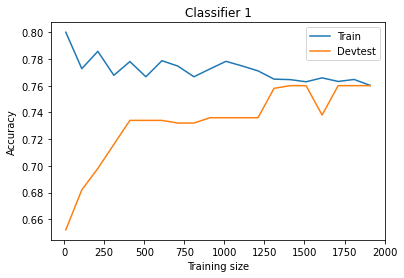

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy1, label='Train')
plt.plot(nsamples, devtest_accuracy1, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 1')
plt.legend()

### This plot shows that there is overfitting, no matter the training size.

In this other plot, overfitting drops as we increase the size of training data, but some overfitting remains when training with 2000 samples of training data.

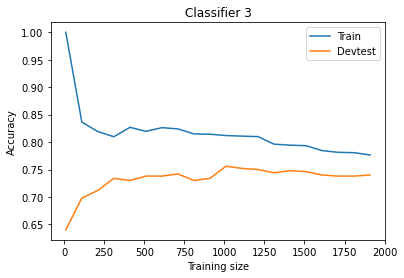

In [25]:
plt.plot(nsamples,train_accuracy3, label='Train')
plt.plot(nsamples,devtest_accuracy3, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 3')
plt.legend()

## Gender classifier in Scikit-learn

In [26]:
from sklearn.naive_bayes import MultinomialNB
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 # if the character is out of the alphabet
    return result
def gender_features(word):
    "Return the one-hot encoding of the last two characters"
    assert len(word) >= 2
    last = one_hot_character(word[-1])
    secondlast = one_hot_character(word[-2])
    return secondlast + last

The function `gender_features` concatenates the one-hot encoding of the last character and the one-hot encoding of the second last character of the word. We do this by using Python's list concatenation operation `+`. Do not confuse this with summing the contents of the vectors!

* With Python lists: `[1,2,3]+[4,5,6] == [1,2,3,4,5,6]`
* With Numpy arrays: `np.array([1,2,3]) + np.array([4,5,6]) == np.array([2,7,9])`

In [27]:
gender_features("Mary")

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [28]:
train_set = [(gender_features(n), g) for n, g in train_names]
devtest_set = [(gender_features(n), g) for n, g in devtest_names]
test_set = [(gender_features(n), g) for n, g in test_names]
train_X, train_y = zip(*train_set)
classifier = MultinomialNB()
classifier.fit(train_X, train_y)
devtest_X, devtest_y = zip(*devtest_set)
classifier.predict(devtest_X[:5])

array(['female', 'female', 'female', 'female', 'male'], dtype='<U6')

In [29]:
from sklearn.metrics import accuracy_score
devtest_predictions = classifier.predict(devtest_X)
accuracy_score(devtest_y, devtest_predictions)

0.752